## 2.2 Activation Functions: Detailed Overview
*Activation functions play a vital role in neural networks by introducing non-linearity, enabling the network to learn complex patterns in data. Let’s dive into this topic in detail!*

### *1. What are Activation Functions?*

An activation function defines the output of a neuron given its input. Without activation functions, the entire network would act as a linear transformation, limiting its ability to model complex relationships.

**Key Purposes:**

* **Add non-linearity to the model.**
* **Decide whether a neuron should "fire" or not.**
* **Enable the network to approximate any function (Universal Approximation Theorem).**

## 2. Types of Activation Functions

### 2.1. Sigmoid

The sigmoid function squashes the input to a range between 0 and 1:

σ(x)=11+e−x
σ(x)=1+e−x
1
​

**Characteristics:**

* **Output range:** 0 to 1
* **Suitable for binary classification:** Outputs can be interpreted as probabilities.

**Derivative:**

σ′(x)=σ(x)⋅(1−σ(x))
σ′
(x)=σ(x)⋅(1−σ(x))

**Limitations:**

* **Vanishing Gradient Problem:** For very large or very small input values, the gradient of the sigmoid function becomes extremely small. This can slow down the training process significantly, especially in deep neural networks.
* **Not zero-centered:** The output of the sigmoid function is always positive, which can cause inefficiencies in gradient descent algorithms.

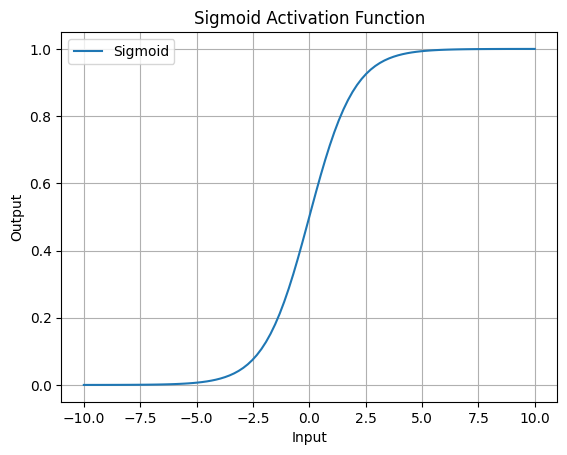

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid, label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.show()


### 2.2. ReLU (Rectified Linear Unit)

The ReLU function is defined as:

f(x)=max⁡(0,x)
f(x)=max(0,x)

**Characteristics:**

* **Output range:** 0 to ∞
* **Introduces sparsity:** Outputs 0 for negative inputs, leading to sparse activations.
* **Computationally efficient:** Faster to compute compared to sigmoid or tanh.
* **Suitable for deep networks:** Helps alleviate the vanishing gradient problem.

**Limitations:**

* **Dying ReLU Problem:** If the weights are initialized poorly or the learning rate is too high, some neurons can get "stuck" at 0 and stop learning.

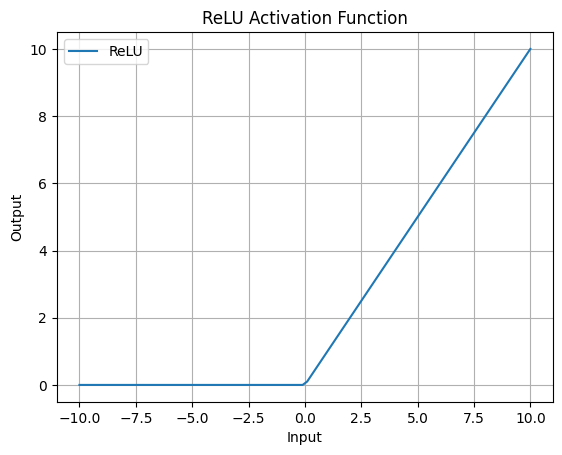

In [4]:
relu = np.maximum(0, x)

plt.plot(x, relu, label='ReLU')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.show()


### 2.3. Tanh (Hyperbolic Tangent)

The tanh function squashes the input to a range between -1 and 1:

tanh⁡(x)=ex−e−xex+e−x
tanh(x)=ex
+e−x
ex
−e−x
​

**Characteristics:**

* **Output range:** -1 to 1
* **Zero-centered:** Outputs are centered around 0, which can improve the performance of optimization algorithms.
* **Suitable for hidden layers:** Often used in hidden layers of neural networks.

**Limitations:**

* **Suffers from the vanishing gradient problem:** Similar to sigmoid, gradients can become very small for large or small input values.

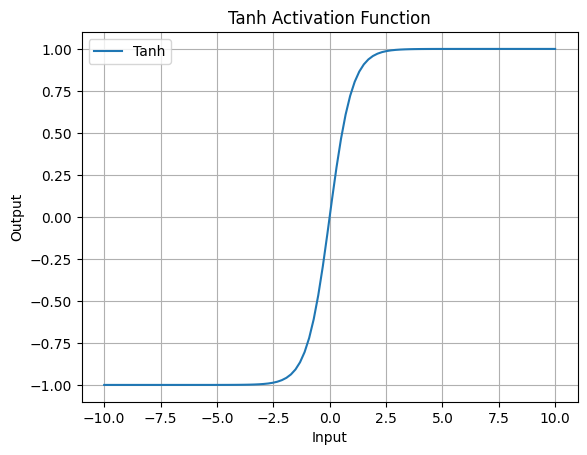

In [5]:
tanh = np.tanh(x)

plt.plot(x, tanh, label='Tanh')
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.show()


### 2.4. Softmax

The softmax function outputs a probability distribution over multiple classes:

f(x)i=exi∑jexjf(x)_i = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
f(x)i
​=∑j
​exj
​
exi
​
​

**Characteristics:**

* **Output range:** 0 to 1
* **Sum of outputs = 1:** Ensures that the outputs represent a valid probability distribution.
* **Ideal for multi-class classification:** Provides probabilities for each class.

**Limitations:**

* **Computationally expensive:** Calculating the denominator involves summing over all possible classes, which can be expensive for a large number of classes.

In [6]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Shift for numerical stability
    return exp_x / np.sum(exp_x, axis=0)

x = np.array([2.0, 1.0, 0.1])
softmax_out = softmax(x)

print("Softmax Output:", softmax_out)


Softmax Output: [0.65900114 0.24243297 0.09856589]


## 4. Visualization Code: Comparing Activations

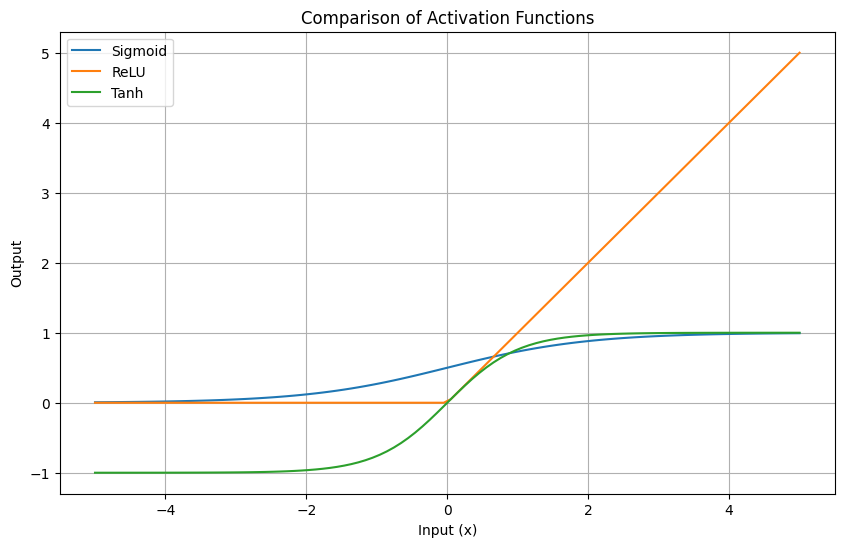

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of input values
x = np.linspace(-5, 5, 100) 

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Calculate activation function outputs
sigmoid_out = sigmoid(x)
relu_out = relu(x)
tanh_out = tanh(x)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each activation function
plt.plot(x, sigmoid_out, label='Sigmoid')
plt.plot(x, relu_out, label='ReLU')
plt.plot(x, tanh_out, label='Tanh')

# Set plot labels and title
plt.title('Comparison of Activation Functions')
plt.xlabel('Input (x)')
plt.ylabel('Output')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## 5. Choosing the Right Activation Function

* **Sigmoid:** 
    * Use for **binary classification** tasks where the output needs to be a probability between 0 and 1.

* **ReLU:** 
    * The **default choice** for hidden layers in most deep neural networks. 
    * Offers faster training and generally better performance than sigmoid or tanh.

* **Tanh:** 
    * Use when **zero-centered activations** are desired. 
    * Can sometimes lead to faster convergence than sigmoid.

* **Softmax:** 
    * Use in the **output layer** for **multi-class classification** tasks to obtain a probability distribution over the classes.

## 6. Mathematical Insights

Activation functions are crucial for the expressive power of neural networks. Without them:

* **Neural networks would behave like a single-layer linear perceptron, regardless of depth.** This limitation severely restricts their ability to learn complex patterns and represent non-linear relationships in data.
* **Non-linear activations like ReLU and Tanh are crucial for learning hierarchical features.** These activations allow the network to extract increasingly complex representations from the input data in deeper layers.

By introducing non-linearity, activation functions enable neural networks to approximate any continuous function (Universal Approximation Theorem), making them powerful tools for a wide range of machine learning tasks.

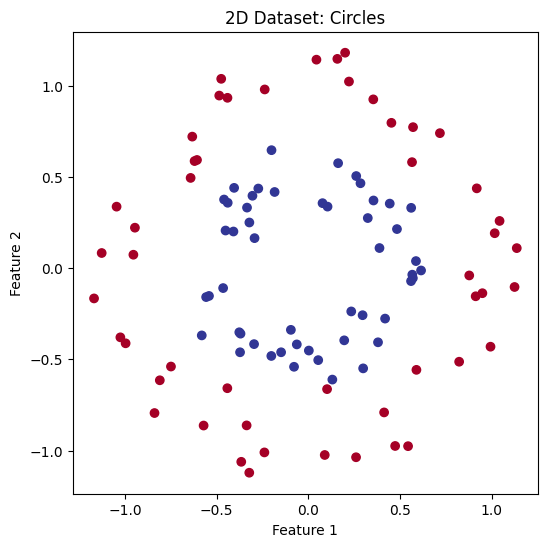

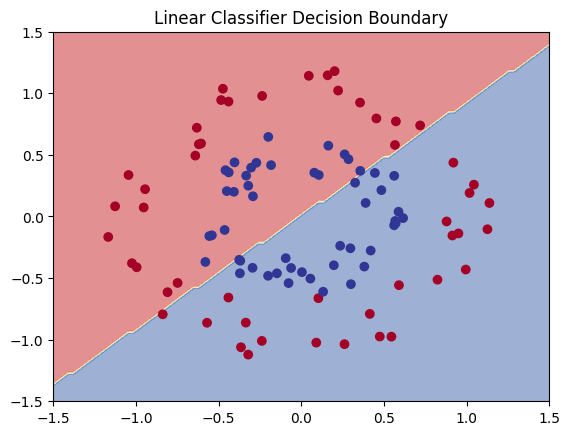

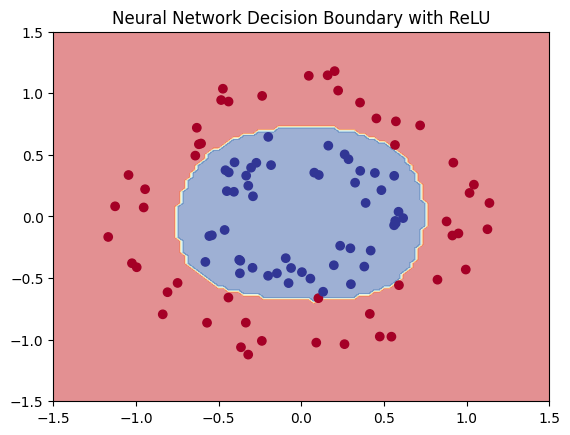

In [36]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier

# Create a simple 2D dataset
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)

# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title('2D Dataset: Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Train a linear classifier (no activation function)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

# Plot the decision boundary of the linear model
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title('Linear Classifier Decision Boundary')
plt.show()

# Train a neural network with ReLU activation
nn_model = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', max_iter=1000)
nn_model.fit(X, y)

# Plot the decision boundary of the neural network
Z_nn = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_nn = Z_nn.reshape(xx.shape)
    
plt.contourf(xx, yy, Z_nn, alpha=0.5, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title('Neural Network Decision Boundary with ReLU')
plt.show()


#### Summary of Key Points

* **Activation functions introduce non-linearity into the neural network.** This is crucial as it allows the network to learn complex patterns and represent non-linear relationships in the data. Without them, the network would be limited to linear transformations.
* **They help in modeling complex patterns by transforming the data in different ways.** Activation functions enable neurons to "fire" selectively, allowing the network to learn hierarchical representations of the input data.
* **The choice of activation function depends on the problem, data, and architecture:**
    * **Use ReLU for deep networks** due to its efficiency and ability to alleviate the vanishing gradient problem.
    * **Use sigmoid/tanh for binary classification or hidden layers.** Sigmoid is suitable for binary classification tasks, while tanh can be beneficial due to its zero-centered output.
    * **Use softmax in the output layer for multi-class classification problems** to obtain a probability distribution over the classes.

## Doubts

#### Why Non-linearity Matters in Neural Networks:

In neural networks, the goal is to model complex patterns or functions. If a neural network only uses linear functions (such as straight lines or simple arithmetic operations), no matter how many layers the network has, it can only learn linear relationships between inputs and outputs. This would severely limit the network's ability to model complex data, like images, speech, or any real-world data where relationships are usually non-linear.

Non-linear activation functions help in introducing non-linearity to the network. They allow the network to learn more complex patterns that can represent things like curves, intricate surfaces, and other complex relationships that linear functions cannot capture.

#### Mathematical Explanation of Non-linearity:

A linear function can be represented as:

* **w** is the weight
* **b** is the bias
* **x** is the input


#### Visualizing Non-linearity:

To help visualize, imagine you have two points on a graph:

* **A linear function** would be a straight line connecting these two points. 

* **A non-linear function** would be a curve that might bend upwards, downwards, or have other shapes, depending on the function.

**Example:**

* **Linear:** Imagine plotting the points (1, 1) and (2, 2). A linear function would be a straight line passing through both points, representing a constant rate of change.

* **Non-linear:** Now consider the points (1, 1) and (2, 4). A non-linear function, such as a quadratic function, could pass through these points while curving upwards, indicating an increasing rate of change.

This simple analogy helps illustrate how linear functions represent a constant rate of change, while non-linear functions capture more complex relationships and variations.